# K-Nearest Neighbors (SUPERVISED LEARNING)

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


## ALGORITHM

1. Pick a value for K.
2. Calculate the distance of unknown case from all cases.
3. Select the k-observation in the training data that the "nearest" to unknown data point.
4. Predict the response of the unknown data point using the most popuplar response value from the k-nearest neigbour.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Load Data 


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


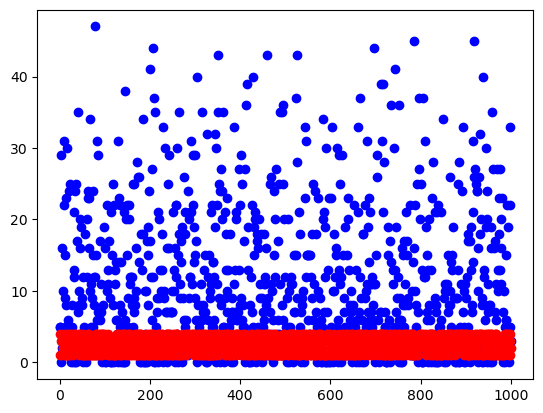

In [4]:
kay=np.linspace(1,len(df['employ'].values),len(df['employ'].values))
hay=np.linspace(1,len(df['custcat'].values),len(df['custcat'].values))
plt.scatter(kay, df['employ'],color='b')
plt.scatter(hay, df['custcat'],color='r')

array([[<Axes: title={'center': 'custcat'}>]], dtype=object)

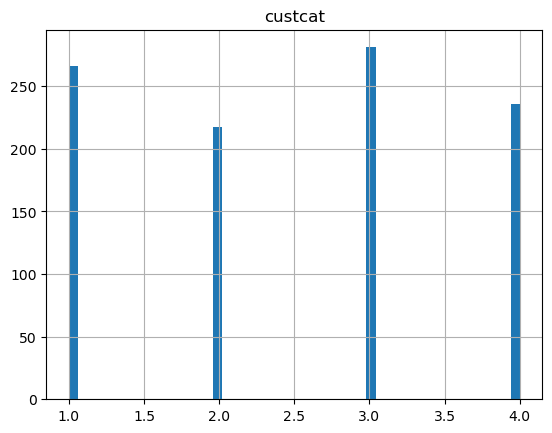

In [5]:
df.hist(column='custcat', bins=50)

### Feature set


Let's define feature sets, X:


In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [8]:
X.shape

(1000, 11)

y = df['custcat'].values
y[0:5]

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


<p><b>WORKFLOW</b></p>
<ul>
    <li>The mean and standard deviation is calculated for each mean with the fit method</li>
    <li>The mean of each feature is subtracted from every data point in that feature. This centers the data around zero, ensuring that the mean of each
        feature becomes zero.</li>
    <li>After subtracting the mean, each centered feature is divided by its corresponding standard deviation.This scales the data such that the
        variance of each feature becomes one.</li>
    <li>The output is a discrete normizalized version of the inpdendent data</li>
</ul>

In [9]:
#fit():The fit() method of the StandardScaler class computes the mean and standard deviation of each feature present in the dataset X.
#transform(X.astype(float)):standardizes the data by subtracting the mean and dividing by the standard deviation for each feature.
Xt = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
Xt[0:5]#features of the transform X data 

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [10]:
Xt.shape

(1000, 11)

# A SCATTER PLOT WITH NORMALIZED DATA

In [11]:
y=df['custcat']

Text(0, 0.5, 'normalized employ')

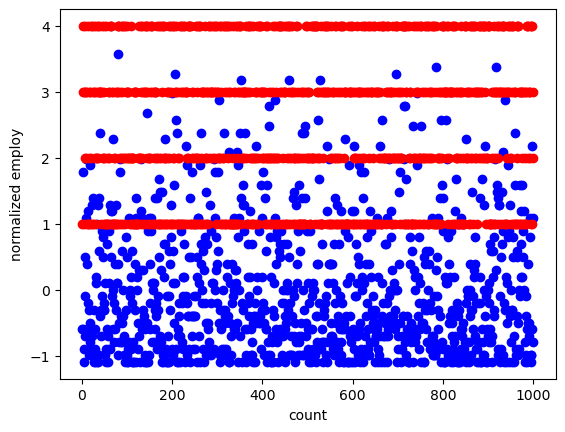

In [12]:
plt.scatter(np.linspace(1,len(Xt),len(Xt)), Xt[:,7],color='b')#employ feature
plt.scatter(np.linspace(1,len(y),len(y)), y,color='r')
plt.xlabel("count")
plt.ylabel("normalized employ")

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xt, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<hr>
<div id="classification">
    <h2>Mulit-Class Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [15]:
k = 16
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=16)

### Predicting

We can use the model to make predictions on the test set:


In [16]:
yhat = neigh.predict(X_test)#TESTING

<hr>
<h3> <b>Accuracy evaluation</b> </h3>

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


## Metrics Function

<p>The accuracy_score function calculates the accuracy of a classification model, which is the ratio of the number of correct predictions to the total number of predictions.</p>
$$Accuracy = \frac{Number of corrected predictions}{Total number of prediction}$$

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))#jaccard index
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.45375
Test set Accuracy:  0.36


## JACCARD INDEX

$$J(y,\hat{y})=\frac{|y\cap\hat{y}|}{|y\cup\hat{y}|}=\frac{|y\cap\hat{y}|}{|y|+|\hat{y}|-|y\cap\hat{y}|}$$

<p>Average setting option appropriate for multi-class classification</p>
<ul>
<li><b>micro</b>: Computes metrics globally by counting the total true positives, false negatives, and false positives.</li>
<li><b>macro</b>: Calculates metrics for each label and finds their unweighted mean. This does not take label imbalance into account.</li>
<li><b>weighted</b>: Calculates metrics for each label and finds their average, weighted by support (the number of true instances for each label).</li>
</ul>

In [18]:
from sklearn.metrics import jaccard_score
print("Train set Accuracy: ",jaccard_score(y_train, neigh.predict(X_train), average='weighted'))
print("Test set Accuracy: ",jaccard_score(y_test, yhat,average='weighted'))

Train set Accuracy:  0.2871811740292793
Test set Accuracy:  0.21777972350230412


## VISUALIZATION

<Axes: xlabel='custcat', ylabel='Density'>

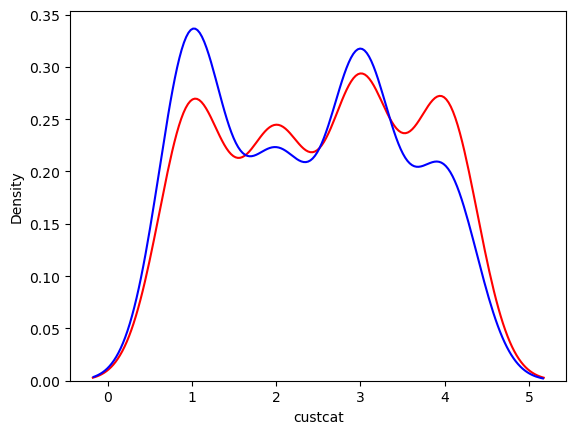

In [19]:
import seaborn as sns
sns.kdeplot(y_test,color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values")

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
print("Train set Accuracy: ",f1_score(y_train, neigh.predict(X_train), average='weighted'))
print("Test set Accuracy: ",f1_score(y_test, yhat,average='weighted'))

Train set Accuracy:  0.4426727900523772
Test set Accuracy:  0.35661710356780907


## F1-SCORE

<p><b>Precision</b>: Precision measures the accuracy of positive predictions. The ratio of correctly predicted positive observations to the total predicted positives.</p>
$$Precision=\frac{TP}{TP+FP}$$
<p><b>Recall</b>: Recall measures the ability of the classifier to find all the positive samples.The ratio of correctly predicted positive observations to all the actual positives.</p>
$$Recall=\frac{TP}{TP+FN}$$
<p><b>Support</b>: The number of actual occurrences of the class in the dataset.</p>
<p><b>F1-score</b>: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.<b>It ranges from 0-1.</b></p>
$$F1-score=2*\frac{precision*Recall}{Recall+Precision}$$

In [21]:
y_test.value_counts() #support

custcat
3    54
4    51
1    51
2    44
Name: count, dtype: int64

In [22]:
np.unique(yhat, return_counts=True)

(array([1, 2, 3, 4], dtype=int64), array([64, 39, 59, 38], dtype=int64))

In [23]:
p =confusion_matrix(y_test, yhat)
p

array([[22,  7, 15,  7],
       [ 7, 13, 11, 13],
       [19,  8, 23,  4],
       [16, 11, 10, 14]], dtype=int64)

In [24]:
#with test set
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.34      0.43      0.38        51
           2       0.33      0.30      0.31        44
           3       0.39      0.43      0.41        54
           4       0.37      0.27      0.31        51

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.36      0.36      0.36       200



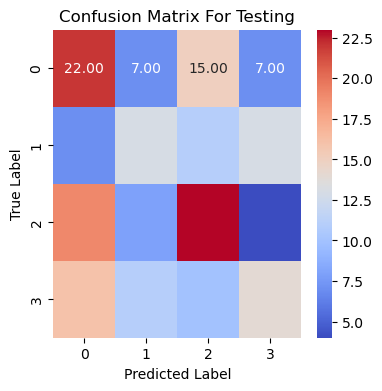

In [25]:
plt.figure(figsize=(4, 4))
sns.heatmap(p, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix For Testing')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
#with training set
print(classification_report(y_train, neigh.predict(X_train)))

              precision    recall  f1-score   support

           1       0.46      0.67      0.54       215
           2       0.41      0.38      0.39       173
           3       0.46      0.46      0.46       227
           4       0.47      0.28      0.35       185

    accuracy                           0.45       800
   macro avg       0.45      0.44      0.44       800
weighted avg       0.45      0.45      0.44       800



#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [27]:
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335])

#### Plot the model accuracy for a different number of neighbors.


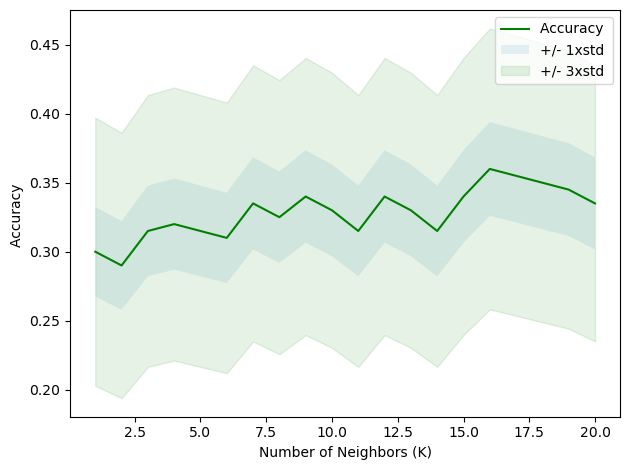

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.36 with k= 16


### **PICKING THE BEST VALUE FOR K** 

<ul>
 <li>A low value of k causes a highly complex model </li>
 <li>A low value of k captures anomaly/noise </li>
 <li>A large value of k captures an overgenerized value of data </li>
</ul>